## 1. Импорт  библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

In [2]:
file_name = 'full_metrics_1G.xlsx'

full_df = pd.read_excel(file_name).drop('Unnamed: 0', axis=1)
full_df

,alg_name,iter,rmse,mae,mape,r2
0,G_RF,1,0.23121,0.19068,1.921563e+14,0.38954
1,G_RF,2,0.23057,0.19024,1.911273e+14,0.39276
2,G_RF,3,0.22995,0.18960,1.894230e+14,0.39653
3,G_RF,4,0.22807,0.18816,1.884020e+14,0.40689
4,G_RF,5,0.22954,0.18929,1.900206e+14,0.39859
...,...,...,...,...,...,...
95,G_KAN,21,0.17502,0.13968,1.377267e+14,0.64592
96,G_KAN,22,0.17990,0.14405,1.367766e+14,0.63201
97,G_KAN,23,0.18217,0.14539,1.412862e+14,0.62009
98,G_KAN,24,0.17417,0.13901,1.367952e+14,0.64802


In [3]:
def bar_plot_full_metr(full_df, title=None, l_color=None, rot=0, tick_order_name=[3,0,2,1], tick_label=None):
    '''Plots result bars from full_metrics df 
    API: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
    https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html
    '''
    l_add_errors = ['mae', 'rmse']
    l_r2_errors = ['r2']   

    gp = full_df.drop(['iter'], axis=1).groupby(['alg_name'])
    means = gp.mean()
    errors = gp.std()

    means = means.loc[means.index[tick_order_name]]
    errors = errors.loc[means.index[tick_order_name]]

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
    fig.suptitle(title, fontsize=20)
    #atches = ['-', '/', '||', '*', '+']
    #print(means[l_add_errors])
    #ax[0].bar()
    means[l_add_errors].plot.bar(yerr=errors[l_add_errors], ax=ax[0], capsize=4, rot=rot, color=l_color, tick_label=tick_label)

    

    means[l_r2_errors].plot.bar(yerr=errors[l_r2_errors], ax=ax[1], capsize=4, rot=rot, color=l_color, tick_label=tick_label)

In [4]:
full_df

,alg_name,iter,rmse,mae,mape,r2
0,G_RF,1,0.23121,0.19068,1.921563e+14,0.38954
1,G_RF,2,0.23057,0.19024,1.911273e+14,0.39276
2,G_RF,3,0.22995,0.18960,1.894230e+14,0.39653
3,G_RF,4,0.22807,0.18816,1.884020e+14,0.40689
4,G_RF,5,0.22954,0.18929,1.900206e+14,0.39859
...,...,...,...,...,...,...
95,G_KAN,21,0.17502,0.13968,1.377267e+14,0.64592
96,G_KAN,22,0.17990,0.14405,1.367766e+14,0.63201
97,G_KAN,23,0.18217,0.14539,1.412862e+14,0.62009
98,G_KAN,24,0.17417,0.13901,1.367952e+14,0.64802


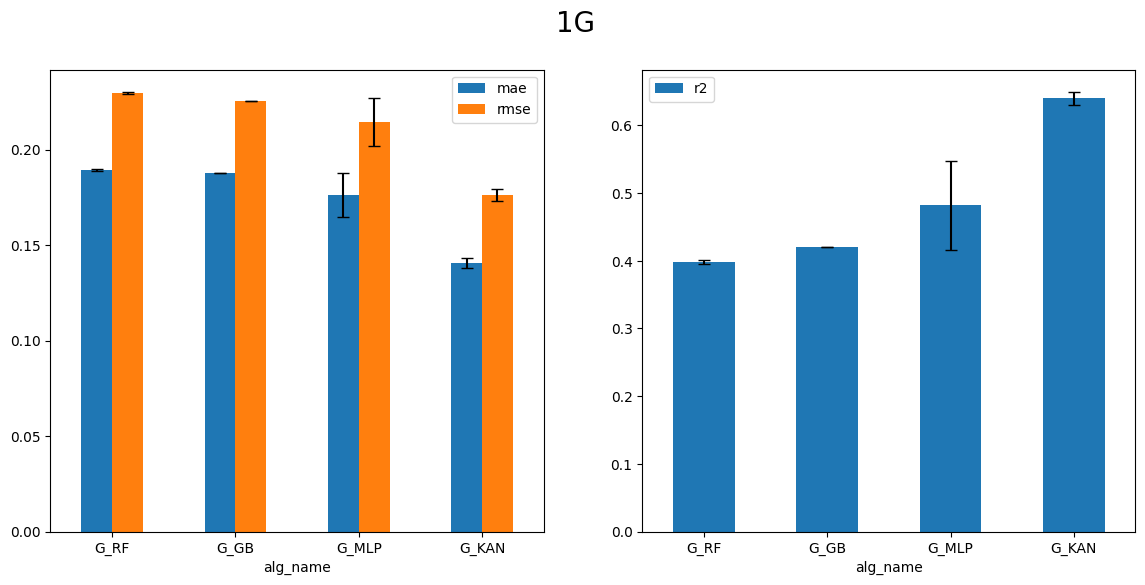

In [5]:
bar_plot_full_metr(full_df, title='1G')

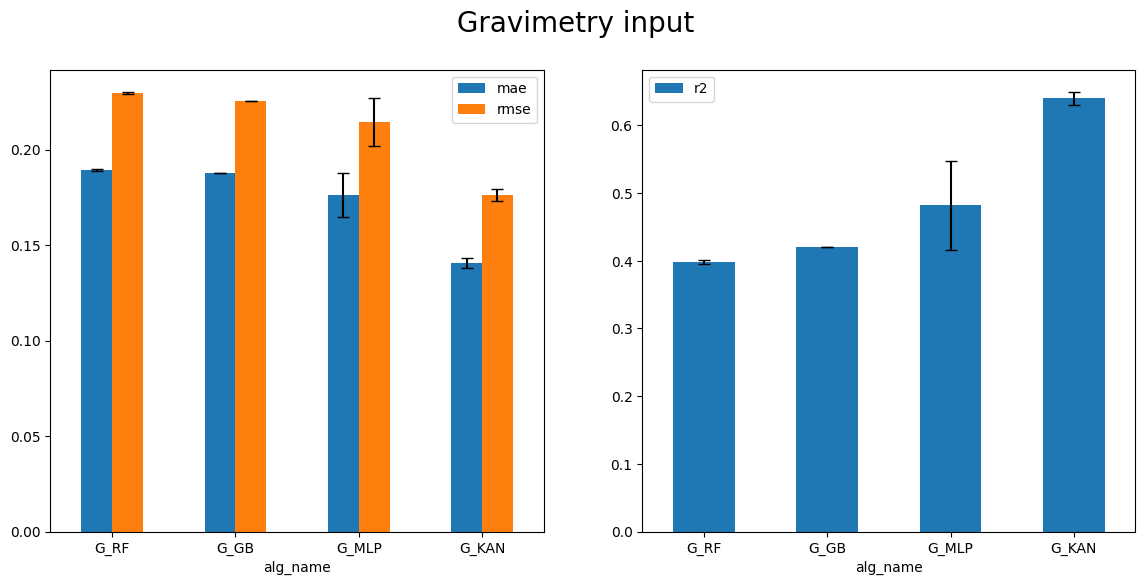

In [6]:
file_name = 'full_metrics_1G.xlsx'

full_df = pd.read_excel(file_name).drop('Unnamed: 0', axis=1)
bar_plot_full_metr(full_df, title='Gravimetry input')

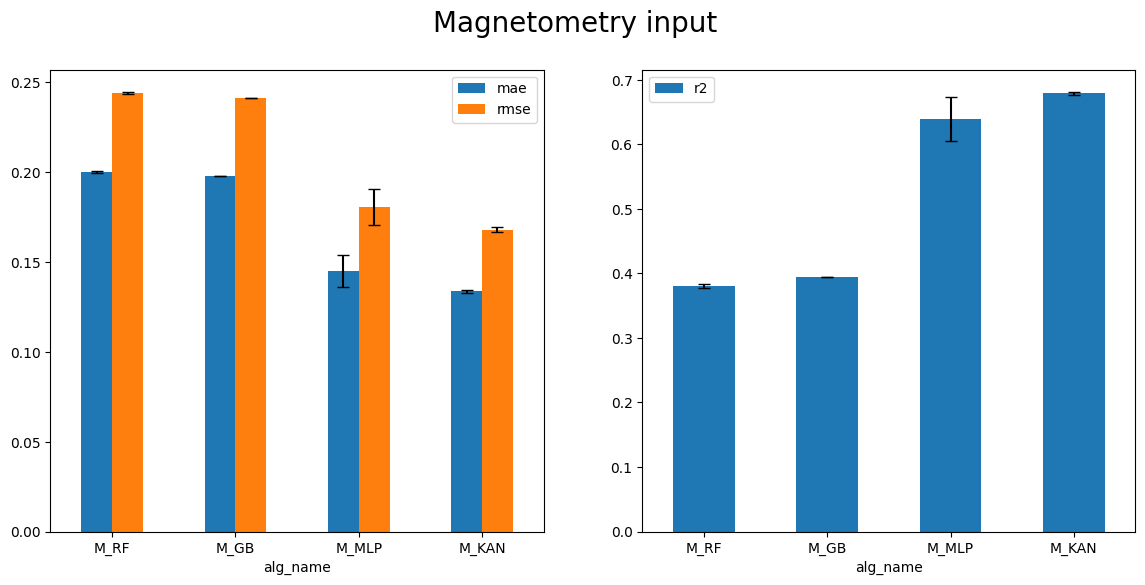

In [7]:
file_name = 'full_metrics_1M.xlsx'

full_df = pd.read_excel(file_name).drop('Unnamed: 0', axis=1)
bar_plot_full_metr(full_df, title='Magnetometry input')

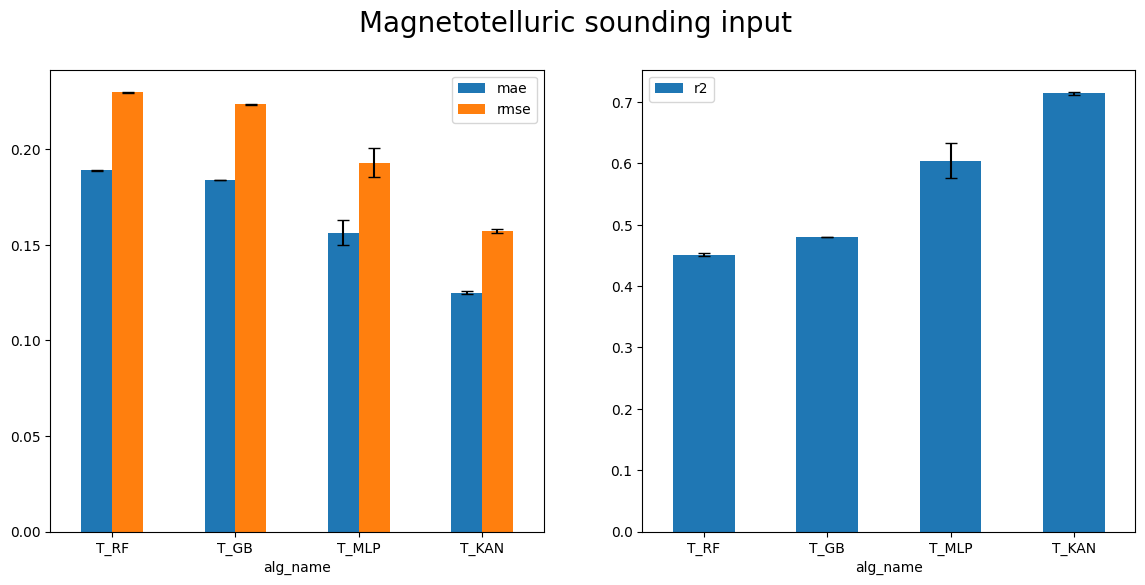

In [8]:
file_name = 'full_metrics_1T.xlsx'

full_df = pd.read_excel(file_name).drop('Unnamed: 0', axis=1)
bar_plot_full_metr(full_df, title='Magnetotelluric sounding input')

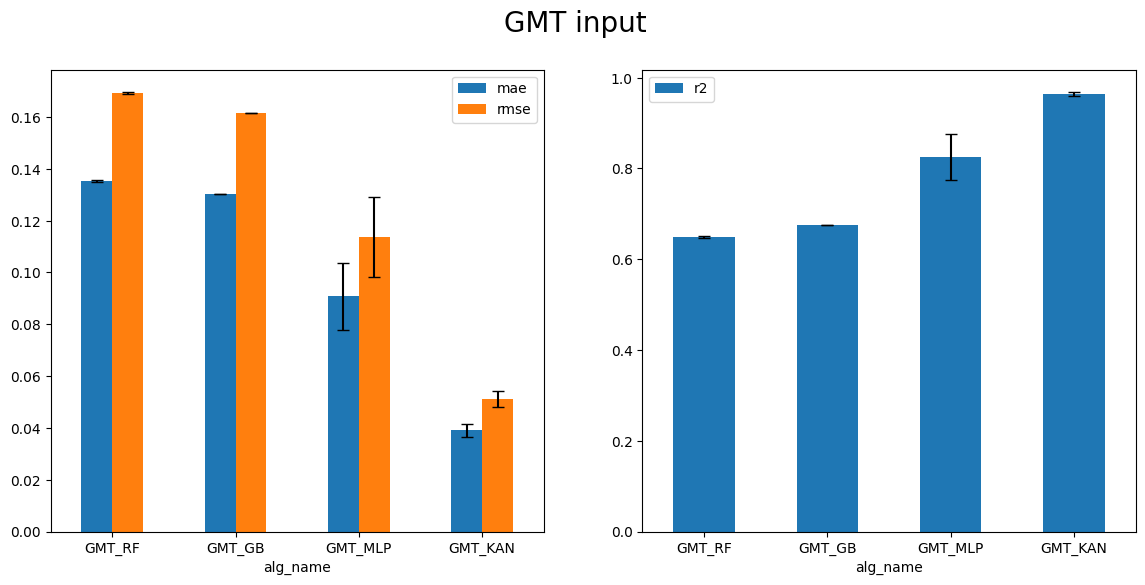

In [9]:
file_name = 'full_metrics_2.xlsx'

full_df = pd.read_excel(file_name).drop('Unnamed: 0', axis=1)
bar_plot_full_metr(full_df, title='GMT input')

Text(0.5, 0, 'number of hidden neurons')

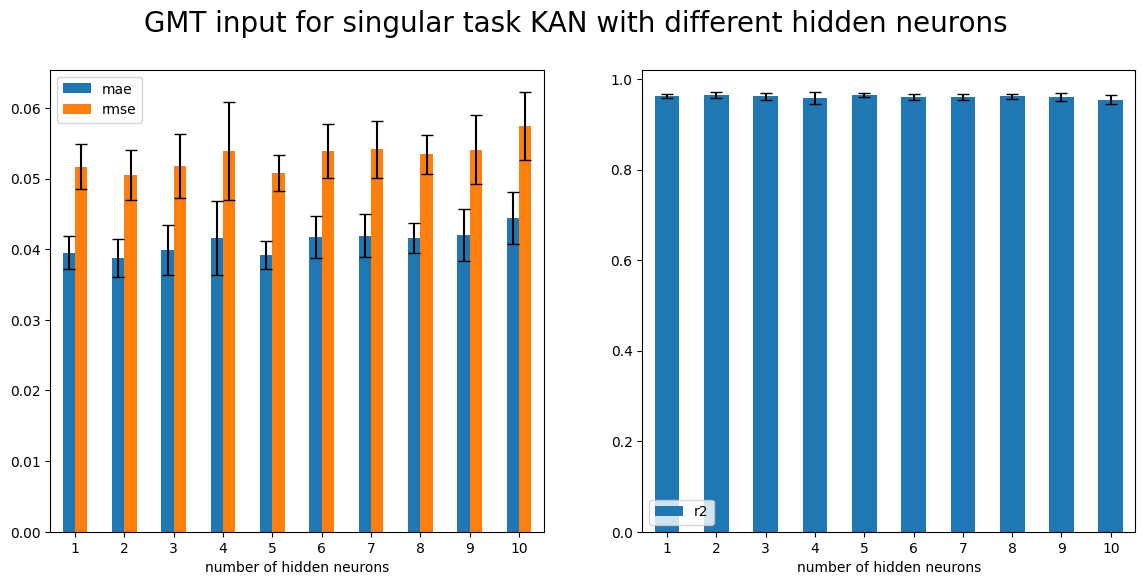

In [10]:
file_name = 'full_metrics_3.xlsx'
l_color = None

full_df = pd.read_excel(file_name).drop('Unnamed: 0', axis=1)

title='GMT input for singular task KAN with different hidden neurons'
rot=0

l_add_errors = ['mae', 'rmse']
l_r2_errors = ['r2']   

gp = full_df.drop(['iter'], axis=1).groupby(['alg_name'])
means = gp.mean()
errors = gp.std()

means = means.sort_index()
errors = errors.sort_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
fig.suptitle(title, fontsize=20)
#atches = ['-', '/', '||', '*', '+']
#print(means[l_add_errors])
#ax[0].bar()

means[l_add_errors].plot.bar(yerr=errors[l_add_errors], ax=ax[0], capsize=4, rot=rot, color=l_color)
means[l_r2_errors].plot.bar(yerr=errors[l_r2_errors], ax=ax[1], capsize=4, rot=rot, color=l_color)

ax[0].set_xlabel('number of hidden neurons')
ax[1].set_xlabel('number of hidden neurons')

In [11]:
means

,rmse,mae,mape,r2
alg_name,,,,
1,0.051696,0.039498,2.015819e+13,0.962703
2,0.050542,0.038750,2.087051e+13,0.964514
3,0.051806,0.039924,2.319709e+13,0.962608
4,0.053910,0.041586,2.470790e+13,0.958801
5,0.050731,0.039205,2.284586e+13,0.965304
6,0.053911,0.041713,2.534862e+13,0.960051
7,0.054123,0.041912,2.614423e+13,0.960448
8,0.053449,0.041574,2.559232e+13,0.961654
9,0.054087,0.041972,2.776670e+13,0.960182


Text(0.5, 0, 'number of hidden neurons')

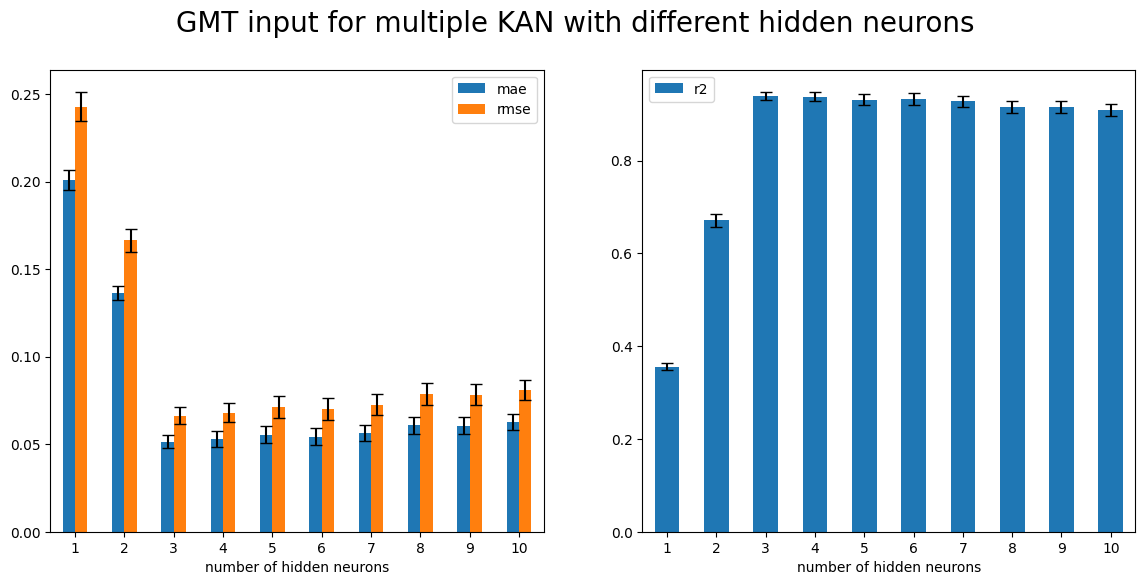

In [18]:
file_name = 'full_metrics_4.xlsx'
l_color = None

full_df = pd.read_excel(file_name).drop('Unnamed: 0', axis=1)

title='GMT input for multiple KAN with different hidden neurons'
tick_order_name=[3, 0, 5, 6, 1, 7, 2, 8, 9, 4]
rot=0

l_add_errors = ['mae', 'rmse']
l_r2_errors = ['r2']   

gp = full_df.drop(['iter'], axis=1).groupby(['alg_name'])
means = gp.mean()
errors = gp.std()

means = means.sort_index()
errors = errors.sort_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
fig.suptitle(title, fontsize=20)
#atches = ['-', '/', '||', '*', '+']
#print(means[l_add_errors])
#ax[0].bar()

means[l_add_errors].plot.bar(yerr=errors[l_add_errors], ax=ax[0], capsize=4, rot=rot, color=l_color)
means[l_r2_errors].plot.bar(yerr=errors[l_r2_errors], ax=ax[1], capsize=4, rot=rot, color=l_color)

ax[0].set_xlabel('number of hidden neurons')
ax[1].set_xlabel('number of hidden neurons')

In [20]:
means.sort_index()

,rmse,mae,mape,r2
alg_name,,,,
GMT_MLP_1024,0.298993,0.255016,2.356203e+14,0.048538
GMT_MLP_128,0.106183,0.084643,7.485751e+13,0.846316
GMT_MLP_16,0.099573,0.079181,7.036413e+13,0.862748
GMT_MLP_2,0.167459,0.141154,1.465591e+14,0.631746
GMT_MLP_256,0.163178,0.135117,1.209446e+14,0.610035
GMT_MLP_32,0.098686,0.078406,7.067591e+13,0.863854
GMT_MLP_4,0.110856,0.088594,7.684585e+13,0.837848
GMT_MLP_512,0.301083,0.256558,2.353000e+14,0.034743
GMT_MLP_64,0.097850,0.077699,7.035472e+13,0.865034


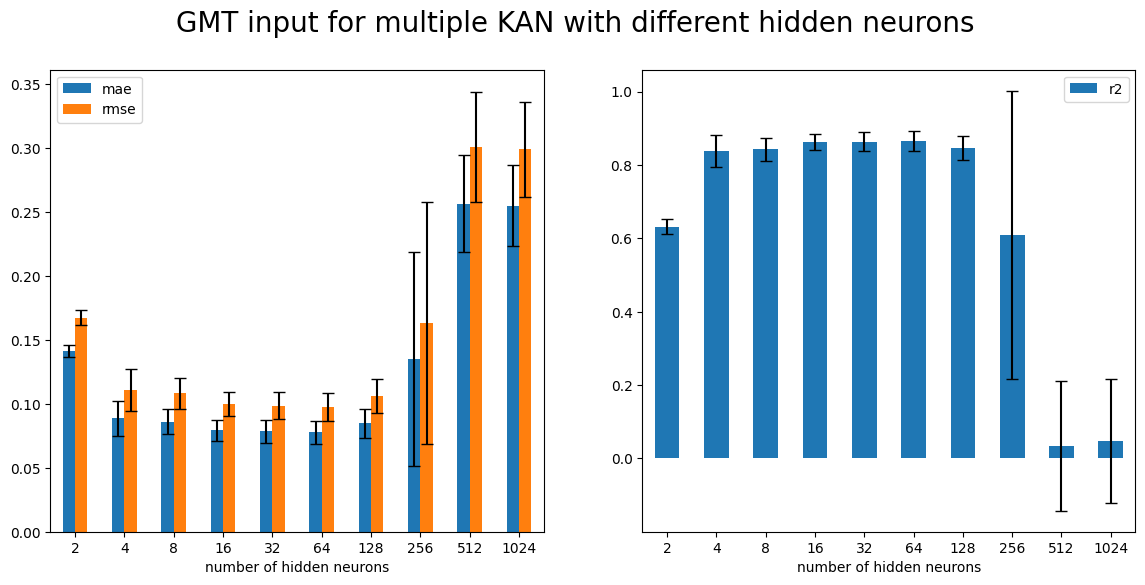

In [19]:
file_name = 'full_metrics_4_NN.xlsx'
l_color = None

full_df = pd.read_excel(file_name).drop('Unnamed: 0', axis=1)

title='GMT input for multiple KAN with different hidden neurons'
rot=0

l_add_errors = ['mae', 'rmse']
l_r2_errors = ['r2']   

gp = full_df.drop(['iter'], axis=1).groupby(['alg_name'])
means = gp.mean()
errors = gp.std()

key = lambda s: int(str(s).split('_')[-1])
def pd_key(l_s):
    l_int=[]
    for s in l_s:
        l_int.append(key(s))
    
    return l_int

means = means.sort_index(key=pd_key)
errors = errors.sort_index(key=pd_key)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
fig.suptitle(title, fontsize=20)
#atches = ['-', '/', '||', '*', '+']
#print(means[l_add_errors])
#ax[0].bar()

means[l_add_errors].plot.bar(yerr=errors[l_add_errors], ax=ax[0], capsize=4, rot=rot, color=l_color)
means[l_r2_errors].plot.bar(yerr=errors[l_r2_errors], ax=ax[1], capsize=4, rot=rot, color=l_color)

'''
ax[0].set_xlabel('number of hidden neurons')
ax[1].set_xlabel('number of hidden neurons')
'''

ax[0].set_xlabel('number of hidden neurons')
ax[1].set_xlabel('number of hidden neurons')
ax[0].set_xticks(range(len(means.index)), pd_key(means.index))
ax[1].set_xticks(range(len(means.index)), pd_key(means.index))

In [27]:
list(means.index), pd_key(means.index)

(['GMT_MLP_16',
  'GMT_MLP_32',
  'GMT_MLP_64',
  'GMT_MLP_128',
  'GMT_MLP_256',
  'GMT_MLP_512',
  'GMT_MLP_1024'],
 [16, 32, 64, 128, 256, 512, 1024])

In [24]:
pd_key(means.index)

[16, 32, 64, 128, 256, 512, 1024]

In [16]:
pd_key(means.index)

[<function __main__.pd_key.<locals>.<lambda>(s)>,
 <function __main__.pd_key.<locals>.<lambda>(s)>,
 <function __main__.pd_key.<locals>.<lambda>(s)>,
 <function __main__.pd_key.<locals>.<lambda>(s)>,
 <function __main__.pd_key.<locals>.<lambda>(s)>,
 <function __main__.pd_key.<locals>.<lambda>(s)>,
 <function __main__.pd_key.<locals>.<lambda>(s)>]

------

In [23]:
gp = full_df.drop(['iter'], axis=1).groupby(['alg_name'])
means = gp.mean()
errors = gp.std()

In [35]:
means.index[[3,0,2,1]]

Index(['T_RF', 'T_GB', 'T_MLP', 'T_KAN'], dtype='object', name='alg_name')

In [36]:
means.loc[means.index[[3,0,2,1]]]

,rmse,mae,mape,r2
alg_name,,,,
T_RF,0.229518,0.188796,1.692916e+14,0.451004
T_GB,0.223229,0.183996,1.675340e+14,0.479457
T_MLP,0.192912,0.156197,1.322950e+14,0.604410
T_KAN,0.157028,0.124946,1.064757e+14,0.714410


<Axes: xlabel='alg_name'>

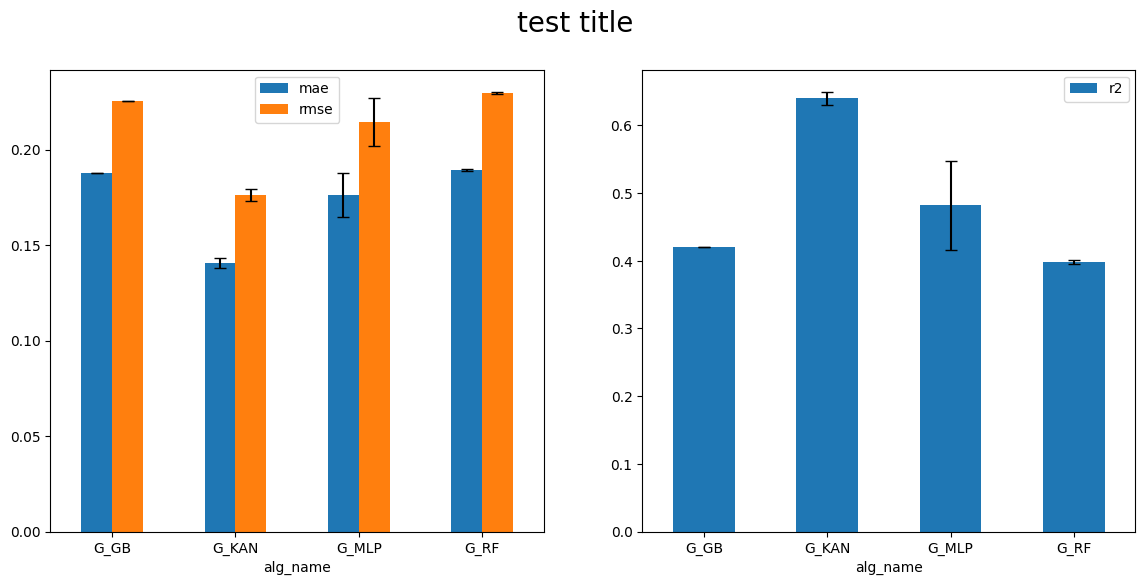

In [10]:
l_add_errors = ['mae', 'rmse']
l_r2_errors = ['r2']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

fig.suptitle('test title', fontsize=20)
means[l_add_errors].plot.bar(yerr=errors[l_add_errors], ax=ax[0], capsize=4, rot=0)
means[l_r2_errors].plot.bar(yerr=errors[l_r2_errors], ax=ax[1], capsize=4, rot=0)